încarcarea și descrierea bazei de date

In [1]:
import pandas as pd  # Pandas pentru manipularea datelor

df = pd.read_csv("Combined Data.csv")

In [2]:
#afiseaza primele 5 randuri
print(df.head())

   Unnamed: 0                                          statement   status
0           0                                         oh my gosh  Anxiety
1           1  trouble sleeping, confused mind, restless hear...  Anxiety
2           2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3           3  I've shifted my focus to something else but I'...  Anxiety
4           4  I'm restless and restless, it's been a month n...  Anxiety


In [3]:
# vercăm informați despre date
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None


Verificăm dacă avem valori lipsă

In [4]:
print(df.isnull().sum())

Unnamed: 0      0
statement     362
status          0
dtype: int64


Curățarea datelor
-eliminam colana cu index, poate fii redurdantă
-eliminăm valorile lipsă din statement

In [5]:
# Eliminăm coloana Unnamed: 0
df = df.drop(columns=["Unnamed: 0"])

# Eliminăm rândurile unde statement este NaN
df = df.dropna(subset=["statement"])

# Verificăm din nou datele după curățare
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 52681 entries, 0 to 53042
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  52681 non-null  object
 1   status     52681 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
None
statement    0
status       0
dtype: int64


Descrierea datelor 
-analizam distribuția eticheteleor și lungimea textelor

In [6]:
print(df["status"].value_counts())  # Numărul de apariții pentru fiecare etichetă

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64


In [7]:
df["text_length"] = df["statement"].apply(len)  # Adăugăm o coloană cu lungimea textelor
print(df["text_length"].describe())  # Afișează statistici (min, max, medie, etc.)

count    52681.000000
mean       578.713749
std        846.268855
min          2.000000
25%         80.000000
50%        317.000000
75%        752.000000
max      32759.000000
Name: text_length, dtype: float64


In [8]:
df.head(10)  # Afișează primele 10 rânduri pentru a verifica modificările

,statement,status,text_length
0,oh my gosh,Anxiety,10
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78
3,I've shifted my focus to something else but I'...,Anxiety,61
4,"I'm restless and restless, it's been a month n...",Anxiety,72
5,"every break, you must be nervous, like somethi...",Anxiety,76
6,"I feel scared, anxious, what can I do? And may...",Anxiety,78
7,Have you ever felt nervous but didn't know why?,Anxiety,47
8,"I haven't slept well for 2 days, it's like I'm...",Anxiety,70
9,"I'm really worried, I want to cry.",Anxiety,34


Corelația se aplică pe date numerice așa că transformăm textul in informație numerică

In [9]:
df["word_count"] = df["statement"].apply(lambda x: len(str(x).split()))

In [10]:
df.head(10)  # Afișează primele 10 rânduri pentru a verifica modificările

,statement,status,text_length,word_count
0,oh my gosh,Anxiety,10,3
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,10
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,14
3,I've shifted my focus to something else but I'...,Anxiety,61,11
4,"I'm restless and restless, it's been a month n...",Anxiety,72,14
5,"every break, you must be nervous, like somethi...",Anxiety,76,14
6,"I feel scared, anxious, what can I do? And may...",Anxiety,78,17
7,Have you ever felt nervous but didn't know why?,Anxiety,47,9
8,"I haven't slept well for 2 days, it's like I'm...",Anxiety,70,14
9,"I'm really worried, I want to cry.",Anxiety,34,7


Convertim etichetele (status) în numere

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["status_encoded"] = encoder.fit_transform(df["status"])

In [12]:
df.head(800)  

,statement,status,text_length,word_count,status_encoded
0,oh my gosh,Anxiety,10,3,0
1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,10,0
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,14,0
3,I've shifted my focus to something else but I'...,Anxiety,61,11,0
4,"I'm restless and restless, it's been a month n...",Anxiety,72,14,0
...,...,...,...,...,...
798,wow shey. I just realized and just found out t...,Normal,75,17,3
799,Galaxy opal giannis makes me cum,Normal,32,6,3
800,the harmonization HSUHSI â ¤ï¸,Normal,30,5,3
801,This morning feels like the wind is really Eid,Normal,46,9,3


Calculăm matricea de corelație

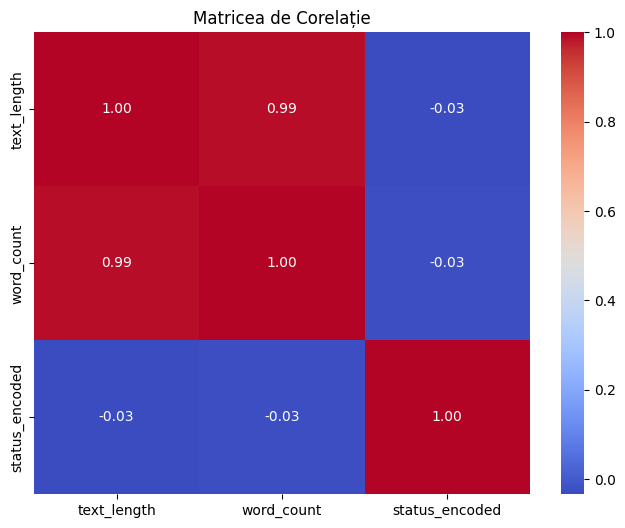

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selectăm doar coloanele numerice
numeric_df = df[["text_length", "word_count", "status_encoded"]]

# Calculăm matricea de corelație
correlation_matrix = numeric_df.corr()

# Vizualizare
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matricea de Corelație")
plt.show()
# Verificăm corelația dintre lungimea textului și status

In [14]:
#stergem coloana text_length pentru ca sunt aproape indenice si sa nu fie redurdanta
df = df.drop(columns=["text_length"])

Calcularea entropiei

In [15]:
import numpy as np

# Calculăm frecvența fiecărei clase
status_counts = df['status'].value_counts(normalize=True)  # Probabilități

# Aplicăm formula entropiei
entropy = -np.sum(status_counts * np.log2(status_counts))

print(f"Entropia datasetului: {entropy:.4f}")


Entropia datasetului: 2.3364


Vom pregăti textul de împărțire pe cuvinte așadar avem nevoie să il curățăm

Curățarea:

Transformare în litere mici
Eliminare punctuație, emoji-uri, caractere speciale
Eliminare stopwords (ex: the, is, at, on...)

In [16]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Descărcăm stopwords dacă nu sunt deja descărcate
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):  # Verificăm dacă textul nu e NaN
        text = text.lower()  # Transformăm în litere mici
        text = re.sub(r'\d+', '', text)  # Eliminăm cifrele
        text = text.translate(str.maketrans('', '', string.punctuation))  # Eliminăm punctuația
        text = ' '.join(word for word in text.split() if word not in stop_words)  # Eliminăm stopwords
        return text
    return ""

# Aplicăm curățarea pe întreaga coloană 'statement'
df['clean_statement'] = df['statement'].apply(clean_text)

# Verificăm rezultatul
print(df[['statement', 'clean_statement']].head(10))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aspire3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                           statement  \
0                                         oh my gosh   
1  trouble sleeping, confused mind, restless hear...   
2  All wrong, back off dear, forward doubt. Stay ...   
3  I've shifted my focus to something else but I'...   
4  I'm restless and restless, it's been a month n...   
5  every break, you must be nervous, like somethi...   
6  I feel scared, anxious, what can I do? And may...   
7    Have you ever felt nervous but didn't know why?   
8  I haven't slept well for 2 days, it's like I'm...   
9                 I'm really worried, I want to cry.   

                                     clean_statement  
0                                            oh gosh  
1  trouble sleeping confused mind restless heart ...  
2  wrong back dear forward doubt stay restless re...  
3  ive shifted focus something else im still worried  
4                im restless restless month boy mean  
5  every break must nervous like something wrong ... 

Acum facem tokenizare(înpărțirea textului în cuvinte) și word cont

Am adaugat încă o coloana în care am cuvintele in liste din fiecare descriere

In [24]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize



# Funcție pentru tokenizare
df['tokens'] = df['clean_statement'].apply(word_tokenize)

# Adăugăm o coloană cu numărul de cuvinte
df['word_count'] = df['tokens'].apply(len)

# Verificăm rezultatul
print(df[['clean_statement', 'tokens', 'word_count']].head(10))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aspire3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Aspire3\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


                                     clean_statement  \
0                                            oh gosh   
1  trouble sleeping confused mind restless heart ...   
2  wrong back dear forward doubt stay restless re...   
3  ive shifted focus something else im still worried   
4                im restless restless month boy mean   
5  every break must nervous like something wrong ...   
6        feel scared anxious may family us protected   
7                       ever felt nervous didnt know   
8        havent slept well days like im restless huh   
9                         im really worried want cry   

                                              tokens  word_count  
0                                         [oh, gosh]           2  
1  [trouble, sleeping, confused, mind, restless, ...           7  
2  [wrong, back, dear, forward, doubt, stay, rest...           9  
3  [ive, shifted, focus, something, else, im, sti...           8  
4         [im, restless, restless, month, boy, m

Facem un shuffle la date pentru a amesteca rândurile

In [26]:
from sklearn.utils import shuffle

df = shuffle(df, random_state=42)  # Random_state asigură reproducibilitate
df.reset_index(drop=True, inplace=True)  # Resetăm indexul după shuffle
print(df.head(10))  # Verificăm primele 10 rânduri după amestecare

                                           statement      status  word_count  \
0               I'm lazy to complain about it ba ihh      Normal           5   
1  i think the wifi on my iphone is broken it wil...      Normal          11   
2  Good tracking apps? I've been trying to find a...     Bipolar          40   
3  I have recently looked into reddit and found t...  Depression         293   
4                  that's your favorite thing to do?      Normal           3   
5  I have enough goodies to play santa claus but ...    Suicidal          24   
6  want to sleep but soon the call to prayer for ...      Normal           8   
7  you use them to wipe the handle of the shoppin...      Normal           5   
8  Is it good to only focus on 1 goal? What I mea...      Stress         219   
9  Hi guys, I am looking for podcasts to listen t...  Depression          58   

   status_encoded                                    clean_statement  \
0               3                            im

Calculăm Gini Index care este utilizat pentru a măsura impuritatea unui set de date.

In [27]:
import numpy as np

# Calculăm proporția fiecărei clase
status_counts = df['status'].value_counts(normalize=True)

# Aplicăm formula Gini Index
gini_index = 1 - np.sum(status_counts ** 2)

print(f"Gini Index: {gini_index:.4f}")


Gini Index: 0.7665


Information Quantity (IQ) este similară cu entropia

In [28]:
# Calculăm Information Quantity (aceeași formulă ca entropia)
information_quantity = -np.sum(status_counts * np.log2(status_counts))

print(f"Information Quantity: {information_quantity:.4f}")


Information Quantity: 2.3364


Facem un grafic pentru a observa comparațile dintre Entropie, Gini Index și Information Quantity.

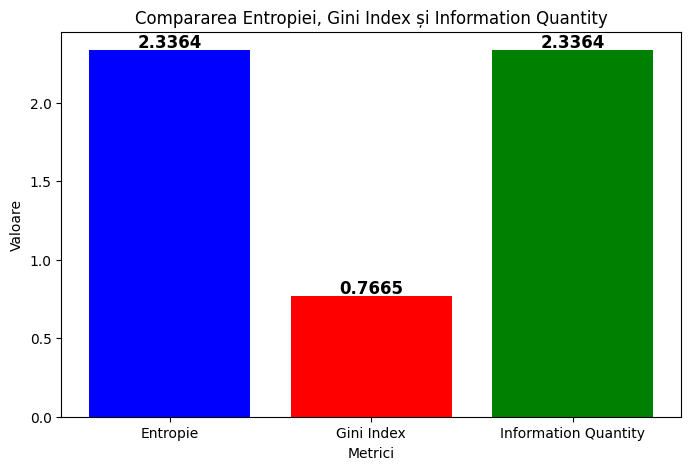

In [29]:
import matplotlib.pyplot as plt

# Valori pentru vizualizare
metrics = ['Entropie', 'Gini Index', 'Information Quantity']
values = [entropy, gini_index, information_quantity]

# Creăm un bar chart
plt.figure(figsize=(8,5))
plt.bar(metrics, values, color=['blue', 'red', 'green'])

# Adăugăm etichete și titlu
plt.xlabel("Metrici")
plt.ylabel("Valoare")
plt.title("Compararea Entropiei, Gini Index și Information Quantity")

# Afișăm valorile pe bare
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12, fontweight='bold')

# Afișăm graficul
plt.show()
